#### Librerias:

In [607]:
import numpy as np
from pyswarm import pso
import math
import matplotlib.pyplot as plt
%matplotlib inline

#### Función objetivo:

In [608]:
# funcion objetivo
def funcion_objetivo(x, y, a, b):
    
    return (x - a)**2 + (y + b)**2

#### Parametros algoritmo:

In [609]:
# parametros
num_particulas = 20  # numero de particulas
dim = 2  # dimensiones
cantidad_iteraciones = 10  # maximo numero de iteraciones
c1 = 2  # componente cognitivo
c2 = 2  # componente social
w = 0  # factor de inercia
limite_inf = -100 # limite inferior de busqueda
limite_sup = 100 # limite superior de busqueda

#### Inicializaciones:

In [610]:
a = -3
b = 8

In [611]:
# inicializacion
particulas = np.random.uniform(limite_inf, limite_sup, (num_particulas, dim))  # posiciones iniciales de las particulas

velocidades = np.zeros((num_particulas, dim))  # inicializacion de la matriz de velocidades en cero

# inicializacion de pbest y gbest
pbest = particulas.copy()  # mejores posiciones personales iniciales

fitness_pbest = np.empty(num_particulas)  # mejores fitness personales iniciales
for i in range(num_particulas):
    fitness_pbest[i] = funcion_objetivo(particulas[i][0], particulas[i][1], a, b)

# cambiando por np.argmin y por np.min creo que tenemos un problema de minimización
gbest = pbest[np.argmin(fitness_pbest)]  # mejor posicion global inicial
fitness_gbest = np.min(fitness_pbest)  # fitness global inicial

#### Realizamos la busqueda, aplicamos el algoritmo PSO:

In [612]:
# busqueda
for iteracion in range(cantidad_iteraciones):
    for i in range(num_particulas):  # iteracion sobre cada partícula
        r1, r2 = np.random.rand(), np.random.rand()  # generacion dos numeros aleatorios

        # actualizacion de la velocidad de la particula en cada dimension
        for d in range(dim):
            velocidades[i][d] = (w * velocidades[i][d] + c1 * r1 * (pbest[i][d] - particulas[i][d]) + c2 * r2 * (gbest[d] - particulas[i][d]))

        for d in range(dim):
            particulas[i][d] = particulas[i][d] + velocidades[i][d]  # cctualizacion de la posicion de la particula en cada dimension

            # mantenimiento de las partículas dentro de los limites
            particulas[i][d] = np.clip(particulas[i][d], limite_inf, limite_sup)

        fitness = funcion_objetivo(particulas[i][0], particulas[i][1], a, b)  # Evaluacion de la funcion objetivo para la nueva posicion

        # actualizacion el mejor personal
        if fitness < fitness_pbest[i]:
            fitness_pbest[i] = fitness  # actualizacion del mejor fitness personal
            pbest[i] = particulas[i].copy()  # actualizacion de la mejor posicion personal

            # actualizacion del mejor global
            if fitness < fitness_gbest:
                fitness_gbest = fitness  # actualizacion del mejor fitness global
                gbest = particulas[i].copy()  # actualizacion de la mejor posicion global

    # imprimir el mejor global en cada iteracion
    print(f"Iteración {iteracion + 1}: Mejor posición global {gbest}, Valor {fitness_gbest}")

Iteración 1: Mejor posición global [ -3.35318934 -11.78899236], Valor 14.48120581109689
Iteración 2: Mejor posición global [ -3.35318934 -11.78899236], Valor 14.48120581109689
Iteración 3: Mejor posición global [ -4.68763404 -10.87588044], Valor 11.11879693774772
Iteración 4: Mejor posición global [-2.86293494 -7.16756124], Valor 0.7117411133625059
Iteración 5: Mejor posición global [-2.78715683 -8.02740313], Valor 0.046053145698700025
Iteración 6: Mejor posición global [-2.86434931 -8.058573  ], Valor 0.0218319053421841
Iteración 7: Mejor posición global [-3.00754565 -8.05804318], Valor 0.00342594802916302
Iteración 8: Mejor posición global [-2.97363051 -8.0351067 ], Valor 0.0019278305430981543
Iteración 9: Mejor posición global [-2.9805237  -8.02141015], Valor 0.0008377205588178467
Iteración 10: Mejor posición global [-2.9923781  -7.99817349], Valor 6.142954503281898e-05


In [613]:
# resultado
solucion_optima = gbest  # mejor posicion global final
valor_optimo = fitness_gbest  # mejor fitness global final

print(f"a={a} y b={b}")
print("Valor optimo:", valor_optimo)
print("La solucion optima ocurre en [x, y] = ", solucion_optima)

a=-3 y b=8
Valor optimo: 6.142954503281898e-05
La solucion optima ocurre en [x, y] =  [-2.9923781  -7.99817349]


Desde la web conseguimos la siguiente información (solo la uso para comparar con lo que obtengo):  
Para a=10 y b=10 el minimo es 0, y se da en x=10 y=-10  
Para a=5 y b=0 el minimo es 0, y se da en x=5 y=0  
Para a=-3 y b=-8 el minimo es 0, y se da en x=-3 y=8  
Con esto podemos decir que el valor minimo siempre será en este intervalo, y el valor de x e y dependerá de a y b.  

#### Punto c: grafico.

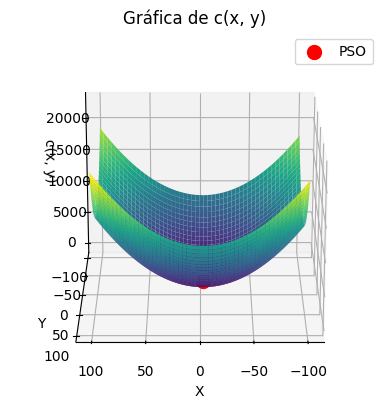

In [603]:
# Define la función c(x, y)
def c(x, y):
    return (x - a)**2 + (y + b)**2

# Intervalos de las variables independientes
x = np.linspace(-100, 100, 1000)
y = np.linspace(-100, 100, 1000)
X, Y = np.meshgrid(x, y)
Z = c(X, Y)

# Configuración de la gráfica
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')

# Agrega los puntos de máximo en rojo
# Suponiendo que este es el punto de minimo encontrado por tu algoritmo
x_min = -2.7295 
y_min = -8.4725
z_min = 0.2964

# Agrega los puntos a la gráfica
ax.scatter(x_min, y_min, z_min, color='red', label='PSO', s=100)

# Etiquetas y título
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('c(x, y)')
ax.set_title('Gráfica de c(x, y)')
ax.legend()

# Rotar el gráfico antes de mostrarlo
ax.view_init(elev=20, azim=90)  # Ajusta estos valores para cambiar la vista

# Muestra la gráfica
plt.show()

#### Punto d: grafico gbest.

In [614]:
gbest_list = [[-3.35318934, -11.78899236],
[-3.35318934, -11.78899236],
[-4.68763404, -10.87588044],
[-2.86293494, -7.16756124], 
[-2.78715683, -8.02740313], 
[-2.86434931, -8.058573  ], 
[-3.00754565, -8.05804318], 
[-2.97363051, -8.0351067 ], 
[-2.9805237 , -8.02141015], 
[-2.9923781 , -7.99817349]]

gbest_x_list = [g[0] for g in gbest_list]
gbest_y_list = [g[1] for g in gbest_list]

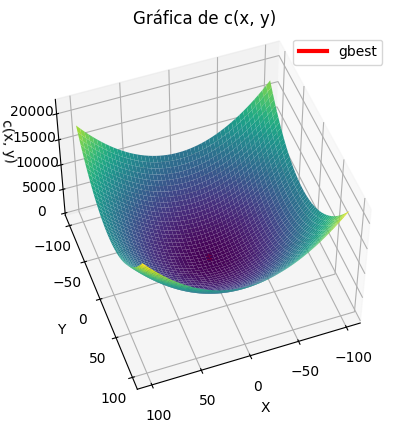

In [617]:
# Define la función c(x, y)
def c(x, y):
    return (x - a)**2 + (y + b)**2

# Intervalos de las variables independientes
x = np.linspace(-100, 100, 1000)
y = np.linspace(-100, 100, 1000)
X, Y = np.meshgrid(x, y)
Z = c(X, Y)

# Configuración de la gráfica
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')

# Agrega los puntos de máximo en rojo
# Suponiendo que este es el punto de minimo encontrado por tu algoritmo
gbest_z_list = [c(g[0], g[1]) for g in gbest_list]

# Agrega los puntos a la gráfica
ax.plot(gbest_x_list, gbest_y_list, gbest_z_list, color='red', label='gbest', lw=3)

# Etiquetas y título
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('c(x, y)')
ax.set_title('Gráfica de c(x, y)')
ax.legend()

# Rotar el gráfico antes de mostrarlo
ax.view_init(elev=50, azim=70)  # Ajusta estos valores para cambiar la vista

# Muestra la gráfica
plt.show()

#### Punto f

In [624]:
# funcion objetivo
def funcion_objetivo(x):
    
    return (x[0] + 3)**2 + (x[1] + 8)**2

best_position, best_value = pso(funcion_objetivo, [-100, -100], [100, 100], omega=0,
                                 phip = 2, phig = 2, swarmsize=20, maxiter=10, debug=True)

print(f"Best position: {best_position} and best value: {best_value}")

No constraints given.
New best for swarm at iteration 1: [ -9.7272154  -28.20529005] 453.5091729269345
New best for swarm at iteration 1: [16.22410272  0.95862101] 449.8230157178319
New best for swarm at iteration 1: [ 13.11757251 -20.60103465] 418.56221779387977
Best after iteration 1: [ 13.11757251 -20.60103465] 418.56221779387977
New best for swarm at iteration 2: [ 11.23897496 -19.91864215] 344.8024385824327
New best for swarm at iteration 2: [ 11.07362473 -17.91306847] 296.3358396402082
New best for swarm at iteration 2: [ 12.96167639 -14.22170584] 293.4847367666794
New best for swarm at iteration 2: [11.95575446 -9.57810852] 226.16501785554104
New best for swarm at iteration 2: [-1.77849218 -2.92796574] 27.21761286334164
Best after iteration 2: [-1.77849218 -2.92796574] 27.21761286334164
New best for swarm at iteration 3: [ 0.0660956  -9.97348399] 13.295581312587569
New best for swarm at iteration 3: [-0.02353553 -8.44108612] 9.053897720024507
Best after iteration 3: [-0.02353553

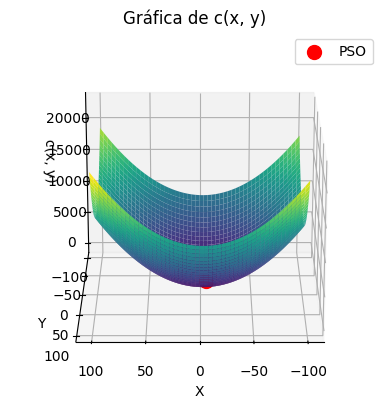

In [619]:
# Define la función c(x, y)
def c(x, y):
    return (x - a)**2 + (y + b)**2

# Intervalos de las variables independientes
x = np.linspace(-100, 100, 1000)
y = np.linspace(-100, 100, 1000)
X, Y = np.meshgrid(x, y)
Z = c(X, Y)

# Configuración de la gráfica
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')

# Agrega los puntos de máximo en rojo
# Suponiendo que este es el punto de minimo encontrado por tu algoritmo
x_min = -6.03165576
y_min = -7.90259095
z_min = 9.200425146941349

# Agrega los puntos a la gráfica
ax.scatter(x_min, y_min, z_min, color='red', label='PSO', s=100)

# Etiquetas y título
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('c(x, y)')
ax.set_title('Gráfica de c(x, y)')
ax.legend()

# Rotar el gráfico antes de mostrarlo
ax.view_init(elev=20, azim=90)  # Ajusta estos valores para cambiar la vista

# Muestra la gráfica
plt.show()

In [621]:
# para w=0 o w=0.7 hay que cambiar gbest_list
gbest_list = [[ -2.59536707, -12.6592265 ],
[ -2.59536707, -12.6592265 ],
[ -2.59536707, -12.6592265 ],
[-6.03165576, -7.90259095] , 
[-6.03165576, -7.90259095] , 
[-6.03165576, -7.90259095] , 
[-6.03165576, -7.90259095] , 
[-6.03165576, -7.90259095] , 
[-6.03165576, -7.90259095] , 
[-6.03165576, -7.90259095] , ]

gbest_x_list = [g[0] for g in gbest_list]
gbest_y_list = [g[1] for g in gbest_list]

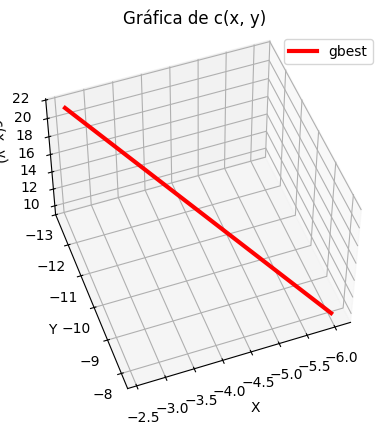

In [623]:
# Define la función c(x, y)
def c(x, y):
    return (x - a)**2 + (y + b)**2

# Intervalos de las variables independientes
x = np.linspace(-100, 100, 1000)
y = np.linspace(-100, 100, 1000)
X, Y = np.meshgrid(x, y)
Z = c(X, Y)

# Configuración de la gráfica
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')

# Agrega los puntos de máximo en rojo
# Suponiendo que este es el punto de minimo encontrado por tu algoritmo
gbest_z_list = [c(g[0], g[1]) for g in gbest_list]

# Agrega los puntos a la gráfica
ax.plot(gbest_x_list, gbest_y_list, gbest_z_list, color='red', label='gbest', lw=3)

# Etiquetas y título
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('c(x, y)')
ax.set_title('Gráfica de c(x, y)')
ax.legend()

# Rotar el gráfico antes de mostrarlo
ax.view_init(elev=50, azim=70)  # Ajusta estos valores para cambiar la vista

# Muestra la gráfica
plt.show()